High School Dropouts in Texas
By Kaitlan Wong

This purpose of this project is the explore and analyze high school dropout data to identify populations in Texas that need support.

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Excel spreadsheet into a Pandas DataFrame
full_file_path = "C:\\Users\\kaitl\\Documents\\Professional Development\\Python\\Projects\\High School Dropouts\\High school dropouts by race and ethnicity.xlsx"

# Load the Excel spreadsheet into a Pandas DataFrame
df = pd.read_excel(full_file_path)

In [3]:
# Data Cleaning and Preprocessing
# Drop rows with missing values in the 'Data' column
df = df.dropna(subset=['Data'])

# Convert the 'Timeframe' column to numeric years
df['TimeFrame'] = pd.to_numeric(df['TimeFrame'], errors='coerce')


In [4]:
# Basic Exploratory Data Analysis
# Summary statistics
summary_stats = df['Data'].describe()
print(summary_stats)

count    6306.000000
mean        0.040204
std         0.082588
min         0.000000
25%         0.000000
50%         0.013000
75%         0.051000
max         1.000000
Name: Data, dtype: float64


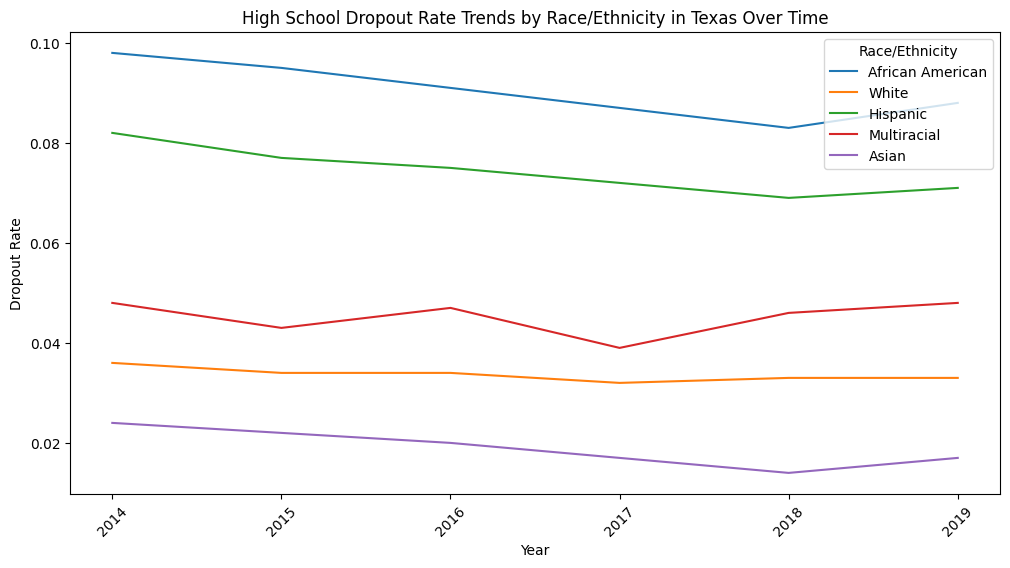

In [6]:
# Dropout rate trends by race/ethnicity for Texas over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['Location'] == 'Texas'], x='TimeFrame', y='Data', hue='Race Ethnicity')
plt.title('High School Dropout Rate Trends by Race/Ethnicity in Texas Over Time')
plt.xlabel('Year')
plt.ylabel('Dropout Rate')
plt.xticks(rotation=45)
plt.legend(title='Race/Ethnicity')


# Save the image
plt.savefig('dropout_rate_trends.png')

plt.show()

In [6]:
# Average dropout rate by LocationType
avg_dropout_by_location = df.groupby('LocationType')['Data'].mean()
print("Average Dropout Rate by Location Type:\\n", avg_dropout_by_location)

Average Dropout Rate by Location Type:\n LocationType
County    0.040145
State     0.052500
Name: Data, dtype: float64


In [7]:
# Top 5 locations with the highest average dropout rates across all years
top_5_highest_dropout = df.groupby('Location')['Data'].mean().nlargest(5)
print("Top 5 Locations with the Highest Average Dropout Rates Across All Years:\n", top_5_highest_dropout)

Top 5 Locations with the Highest Average Dropout Rates Across All Years:
 Location
Mills        0.286542
Somervell    0.216333
Real         0.184176
Pecos        0.174704
Howard       0.135828
Name: Data, dtype: float64


In [8]:
# Find the top 5 locations with the highest dropout rates for each year
top_5_by_year = df.groupby('TimeFrame').apply(lambda group: group.nlargest(5, 'Data')).reset_index(drop=True)

# Print the result
print("Top 5 Locations with the Highest Dropout Rates for Each Year:\n", top_5_by_year[['TimeFrame', 'Location', 'Data']])

Top 5 Locations with the Highest Dropout Rates for Each Year:
     TimeFrame   Location   Data
0        2014        Bee  1.000
1        2014   Crockett  1.000
2        2014       Frio  1.000
3        2014  Jim Wells  1.000
4        2014     Reeves  1.000
5        2015       Real  1.000
6        2015     Uvalde  1.000
7        2015  Somervell  0.667
8        2015      Pecos  0.464
9        2015      Mills  0.462
10       2016     Karnes  1.000
11       2016    Wheeler  1.000
12       2016      Garza  0.556
13       2016     Dimmit  0.500
14       2016   Live Oak  0.500
15       2017      Mills  1.000
16       2017      Pecos  0.667
17       2017  Somervell  0.667
18       2017     Shelby  0.600
19       2017   Live Oak  0.500
20       2018       Hall  1.000
21       2018     Parmer  1.000
22       2018    Refugio  1.000
23       2018      Mills  0.611
24       2018  Childress  0.500
25       2019   Hemphill  1.000
26       2019     Marion  1.000
27       2019      Mills  1.000
28       

In [9]:
# Bottom 5 locations with the highest average dropout rates across all years
bottom_5_lowest_dropout = df.groupby('Location')['Data'].mean().nsmallest(5)
print("Top 5 Locations with the Lowest Average Dropout Rates Across All Years:\n", bottom_5_lowest_dropout)

Top 5 Locations with the Lowest Average Dropout Rates Across All Years:
 Location
Borden       0.0
Briscoe      0.0
Foard        0.0
Glasscock    0.0
Irion        0.0
Name: Data, dtype: float64


In [10]:
# Find the top 5 locations with the lowest dropout rates for each year
bottom_5_by_year = df.groupby('TimeFrame').apply(lambda group: group.nsmallest(5, 'Data')).reset_index(drop=True)

# Print the result
print("Top 5 Locations with the Lowest Dropout Rates for Each Year:\n", bottom_5_by_year[['TimeFrame', 'Location', 'Data']])

Top 5 Locations with the Lowest Dropout Rates for Each Year:
     TimeFrame  Location  Data
0        2014  Anderson   0.0
1        2014  Anderson   0.0
2        2014   Andrews   0.0
3        2014   Andrews   0.0
4        2014  Angelina   0.0
5        2015  Anderson   0.0
6        2015   Andrews   0.0
7        2015   Andrews   0.0
8        2015   Andrews   0.0
9        2015  Angelina   0.0
10       2016  Anderson   0.0
11       2016  Anderson   0.0
12       2016   Andrews   0.0
13       2016   Andrews   0.0
14       2016   Andrews   0.0
15       2017  Anderson   0.0
16       2017  Anderson   0.0
17       2017  Anderson   0.0
18       2017   Andrews   0.0
19       2017   Andrews   0.0
20       2018  Anderson   0.0
21       2018  Anderson   0.0
22       2018   Andrews   0.0
23       2018   Andrews   0.0
24       2018   Andrews   0.0
25       2019  Anderson   0.0
26       2019  Anderson   0.0
27       2019   Andrews   0.0
28       2019   Andrews   0.0
29       2019  Angelina   0.0


In [25]:
# Find the highest dropout rate within each race/ethnicity group by year
max_dropout_rate_indices = df.groupby(['TimeFrame', 'Race Ethnicity'])['Data'].idxmax()

# Use the indices to retrieve the corresponding rows from the original DataFrame
highest_dropout_rates_by_race_year = df.loc[max_dropout_rate_indices]

# Display the result
print("Highest Dropout Rates by Race/Ethnicity, Year, and Location:")
print(highest_dropout_rates_by_race_year[['TimeFrame', 'Race Ethnicity', 'Location', 'Data']])


Highest Dropout Rates by Race/Ethnicity, Year, and Location:
      TimeFrame    Race Ethnicity   Location   Data
3750       2014  African American  Jim Wells  1.000
1594       2014             Asian   Crockett  1.000
182        2014          Hispanic  Armstrong  0.250
393        2014       Multiracial        Bee  1.000
5671       2014             White   Presidio  0.250
6965       2015  African American     Uvalde  1.000
7029       2015             Asian  Van Zandt  0.333
2287       2015          Hispanic     Fisher  0.214
5798       2015       Multiracial       Real  1.000
1986       2015             White      Duval  0.300
2560       2016  African American      Garza  0.556
6314       2016             Asian     Shelby  0.500
5292       2016          Hispanic     Newton  0.333
3853       2016       Multiracial     Karnes  1.000
731        2016             White     Brooks  0.250
6405       2017  African American  Somervell  0.667
6318       2017             Asian     Shelby  0.600
154

In [30]:
# Define the output Excel file path
output_excel_file = 'High School Dropout Findings.xlsx'

# Create dataframes
summary_df = pd.DataFrame({'Summary': summary_stats.index, 'Value': summary_stats.values})
avg_dropout_by_location_df = pd.DataFrame({'Location': avg_dropout_by_location.index, 'Value': avg_dropout_by_location.values})
top_5_highest_dropout_df = pd.DataFrame({'Location': top_5_highest_dropout.index, 'Value': top_5_highest_dropout.values})
bottom_5_lowest_dropout_df = pd.DataFrame({'Location': bottom_5_lowest_dropout.index, 'Value': bottom_5_lowest_dropout.values})

# Create a Pandas ExcelWriter object
with pd.ExcelWriter(output_excel_file, engine='xlsxwriter') as writer:
    # Save findings to separate sheets
    summary_df.to_excel(writer, sheet_name='Summary Statistics', index=False)
    avg_dropout_by_location_df.to_excel(writer, sheet_name='Average by LocationType', index=False)
    top_5_highest_dropout_df.to_excel(writer, sheet_name='Top 5 Overall', index=False)
    top_5_by_year.to_excel(writer, sheet_name='Top 5 by Year', index=False)
    bottom_5_lowest_dropout_df.to_excel(writer, sheet_name='Bottom 5 Overall', index=False)
    bottom_5_by_year.to_excel(writer, sheet_name='Bottom 5 by Year', index=False)
    highest_dropout_rates_by_race_year.to_excel(writer, sheet_name='Max by RaceEthnicity', index=False)
    

# Confirm that the data has been saved
print(f"Data has been saved to '{output_excel_file}' with multiple sheets.")



Data has been saved to 'High School Dropout Findings.xlsx' with multiple sheets.
